In [1]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv("./data/rattle/weatherAUS.csv")
del df['RISK_MM']

In [3]:
df.shape

(142193, 23)

In [79]:
df.isna().count(axis=0)

Date             142193
Location         142193
MinTemp          142193
MaxTemp          142193
Rainfall         142193
Evaporation      142193
Sunshine         142193
WindGustDir      142193
WindGustSpeed    142193
WindDir9am       142193
WindDir3pm       142193
WindSpeed9am     142193
WindSpeed3pm     142193
Humidity9am      142193
Humidity3pm      142193
Pressure9am      142193
Pressure3pm      142193
Cloud9am         142193
Cloud3pm         142193
Temp9am          142193
Temp3pm          142193
RainToday        142193
RainTomorrow     142193
dtype: int64

In [56]:
# Label Encoding
labelencoder = LabelEncoder()
# x[:, 0] = labelencoder.fit_transform(x[:, 0])
encode_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for col in encode_columns:
    df[col] = labelencoder.fit_transform(df[col].astype(str))

In [60]:
df['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [58]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,142193.000000,132923.000000,142193.000000,142193.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000
mean,24.158644,12.186400,23.226784,2.349974,5.469824,7.624853,8.255885,39.984292,7.915755,7.974471,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.240989,0.224181
std,14.265894,6.403283,7.117618,8.465173,4.188537,3.781525,4.953096,13.588801,4.911307,4.731493,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.450212,0.417043
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000
50%,24.000000,12.000000,22.600000,0.000000,4.800000,8.500000,9.000000,39.000000,8.000000,8.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000
75%,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,13.000000,48.000000,12.000000,12.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,16.000000,135.000000,16.000000,16.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2.000000,1.000000


In [84]:
df = df.drop(['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
df.isna().sum(0)

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

In [69]:
corr=df.corr()['RainTomorrow']
corr.sort_values()

Sunshine        -0.450768
Pressure9am     -0.246371
Pressure3pm     -0.226031
Temp3pm         -0.192424
MaxTemp         -0.159237
Evaporation     -0.119285
Temp9am         -0.025691
Location        -0.014120
WindDir9am       0.018436
WindDir3pm       0.034435
WindGustDir      0.054488
MinTemp          0.083936
WindSpeed3pm     0.087817
WindSpeed9am     0.090995
WindGustSpeed    0.234010
Rainfall         0.239032
Humidity9am      0.257161
RainToday        0.309652
Cloud9am         0.317380
Cloud3pm         0.381870
Humidity3pm      0.446160
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [65]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap='coolwarm', axis=None)

AttributeError: 'Series' object has no attribute 'style'

In [26]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


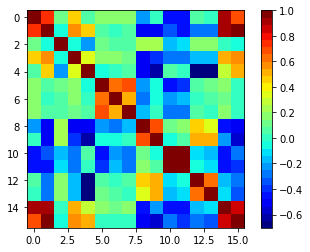

In [36]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
#     ax1.grid(True)
#     plt.title('Abalone Feature Correlation')
#     labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
#     ax1.set_xticklabels(labels,fontsize=6)
#     ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()

correlation_matrix(df)

In [4]:
import sqlite3
conn = sqlite3.connect("./data/wildfire/FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("select * from FIRES", conn)

(1880465, 39)


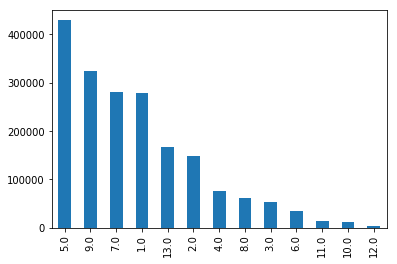

In [8]:
df.describe()
print(df.shape)
df_new['STAT_CAUSE_CODE'].value_counts().plot(kind='bar')

(988951, 39)


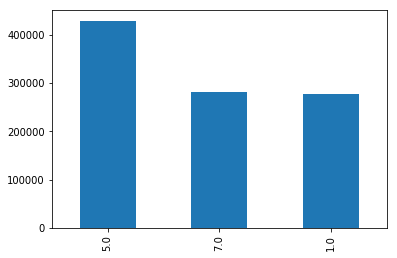

In [23]:
df_try = df_new[df_new['STAT_CAUSE_CODE'].isin([1,7,5])]
print(df_try.shape)
df_try['STAT_CAUSE_CODE'].value_counts().plot(kind='bar')

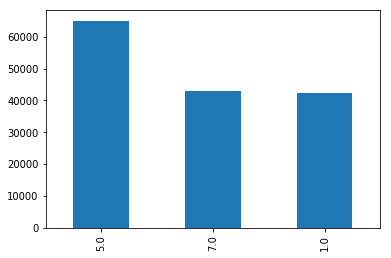

In [29]:
df_try_2 = df_try.sample(150000)
df_try_2['STAT_CAUSE_CODE'].value_counts().plot(kind='bar')

In [26]:
# df['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar')
# missing_cause= df[df['STAT_CAUSE_CODE'] == 13.0]
# df_new = df.drop(missing_cause.index, axis=0)
# df_new.shape

# Combine 13.0 (missing) to Misc (9.0)
# 

In [88]:
# Given the size, location and date, can you predict the cause of a fire wildfire?
# Forming a smaller DF set
# SOURCE_SYSTEM_TYPE, SOURCE_SYSTEM, **REPORTING** columns do not influence wildfire and should not be considered
# FIRE_CODE --> Cost information --> not necessary

In [7]:
df_new = df
df_new.shape

# Dropping instances with low classification


(1880465, 39)

In [7]:
df_new['NEW_STAT_CAUSE_CODE'] = df_new['STAT_CAUSE_CODE']

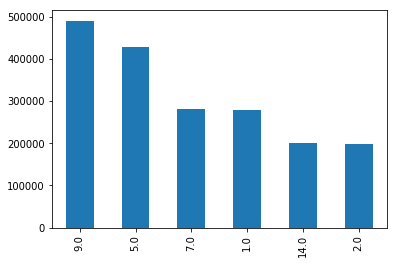

In [8]:
# 5- Debris - 5
# 9 - Misc - 9 + 13 (missing)
# 14 - Human Error -  "Campfire"(4) + "Children"(8) + "Smoking" (3) + "Fireworks" (10)
# 2 - Equipment Failure - "Equipment Use" (2) + "Railroad" (6) + "Powerline" (11) + "Structure" (12)
# 1 - Lightning - 1
# 7 - Arson - 7
# 

# Remapping
df_new.loc[df_new['NEW_STAT_CAUSE_CODE'] == 13.0, 'NEW_STAT_CAUSE_CODE'] = 9.0
df_new.loc[df_new['NEW_STAT_CAUSE_CODE'].isin([4,8,3,10]) , 'NEW_STAT_CAUSE_CODE'] = 14.0
df_new.loc[df_new['NEW_STAT_CAUSE_CODE'].isin([2,6,11,12]) , 'NEW_STAT_CAUSE_CODE'] = 2.0

df_new['NEW_STAT_CAUSE_CODE'].value_counts().plot(kind='bar')

In [10]:
df_new
print(df_new['OWNER_CODE'].isna().sum())
print(df_new['FIRE_SIZE_CLASS'].isna().sum())


df_new['STATE'].value_counts()

0
0


CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [180]:
df_new

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,NEW_STAT_CAUSE_CODE
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,9.0
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,1.0
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,5.0
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,1.0
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,1.0
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,54,8,None,HIDDEN,None,None,None,None,None,2004,2453186.5,182,1800,1.0,Lightning,2453187.5,183.0,1600,0.10,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...,1.0
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,58,9,None,FORK,None,None,None,None,None,2004,2453187.5,183,1800,1.0,Lightning,2453188.5,184.0,1400,0.10,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...,1.0
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,3,02,BK5X,SLATE,None,None,None,None,None,2005,2453437.5,67,1300,5.0,Debris Burning,2453437.5,67.0,1600,0.80,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...,5.0
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,5,03,BLPQ,SHASTA,None,None,None,None,None,2005,2453444.5,74,1200,5.0,Debris Burning,2453444.5,74.0,1700,1.00,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\...",5.0
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,61,10,None,TANGLEFOOT,None,None,None,None,None,2004,2453187.5,183,1800,1.0,Lightning,2453188.5,184.0,1800,0.10,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...,1.0


In [13]:
# COUNTY(use FIPS_CODE) - Ignored since 30% is still None
# relevant Columns

# NWCG_REPORTING_UNIT_NAME, NEW_STAT_CAUSE_CODE, FIRE_SIZE_CLASS, OWNER_CODE, STATE
df_small = df_new[['NWCG_REPORTING_UNIT_NAME','FIRE_SIZE_CLASS','OWNER_CODE', 'STATE','NEW_STAT_CAUSE_CODE']]

In [15]:
df_small
y = df_small['NEW_STAT_CAUSE_CODE']
y

0           9.0
1           1.0
2           5.0
3           1.0
4           1.0
5           1.0
6           1.0
7           5.0
8           5.0
9           1.0
10          1.0
11          1.0
12          9.0
13         14.0
14          1.0
15          1.0
16          2.0
17          2.0
18          5.0
19          1.0
20          1.0
21          1.0
22          1.0
23          1.0
24          1.0
25          1.0
26          9.0
27          1.0
28          5.0
29          5.0
           ... 
1880435     9.0
1880436     5.0
1880437     5.0
1880438     9.0
1880439     9.0
1880440     7.0
1880441     9.0
1880442     9.0
1880443     2.0
1880444     9.0
1880445     9.0
1880446     7.0
1880447     9.0
1880448     1.0
1880449     9.0
1880450     7.0
1880451     2.0
1880452     5.0
1880453    14.0
1880454     9.0
1880455     9.0
1880456     9.0
1880457     7.0
1880458     1.0
1880459     9.0
1880460     9.0
1880461     9.0
1880462     9.0
1880463     9.0
1880464     9.0
Name: NEW_STAT_CAUSE_COD

In [17]:
X = df_small.drop(['NEW_STAT_CAUSE_CODE'],axis=1)

In [20]:
X

,NWCG_REPORTING_UNIT_NAME,FIRE_SIZE_CLASS,OWNER_CODE,STATE
0,Plumas National Forest,A,5.0,CA
1,Eldorado National Forest,A,5.0,CA
2,Eldorado National Forest,A,13.0,CA
3,Eldorado National Forest,A,5.0,CA
4,Eldorado National Forest,A,5.0,CA
5,Eldorado National Forest,A,5.0,CA
6,Eldorado National Forest,A,5.0,CA
7,Shasta-Trinity National Forest,B,13.0,CA
8,Shasta-Trinity National Forest,B,13.0,CA
9,Eldorado National Forest,A,5.0,CA


In [39]:
np.linspace(0.0001, 0.05, 20)

array([0.0001    , 0.00272632, 0.00535263, 0.00797895, 0.01060526,
       0.01323158, 0.01585789, 0.01848421, 0.02111053, 0.02373684,
       0.02636316, 0.02898947, 0.03161579, 0.03424211, 0.03686842,
       0.03949474, 0.04212105, 0.04474737, 0.04737368, 0.05      ])

In [43]:
np.around(np.linspace(0.0018, 0.03, 10),3)

array([0.002, 0.005, 0.008, 0.011, 0.014, 0.017, 0.021, 0.024, 0.027,
       0.03 ])